# Permeable contorno

In [1]:
from matplotlib import pyplot as plt

In [7]:
from scipy.spatial.distance import euclidean

In [2]:
import numpy as np

In [195]:
disc1=np.array([0.0, 1.0])
r1=1.8

disc2=np.array([3.0, 2.0])
r2=0.6

disc3=np.array([5.0, 1.0])
r3=0.1

In [212]:
rp=0.7

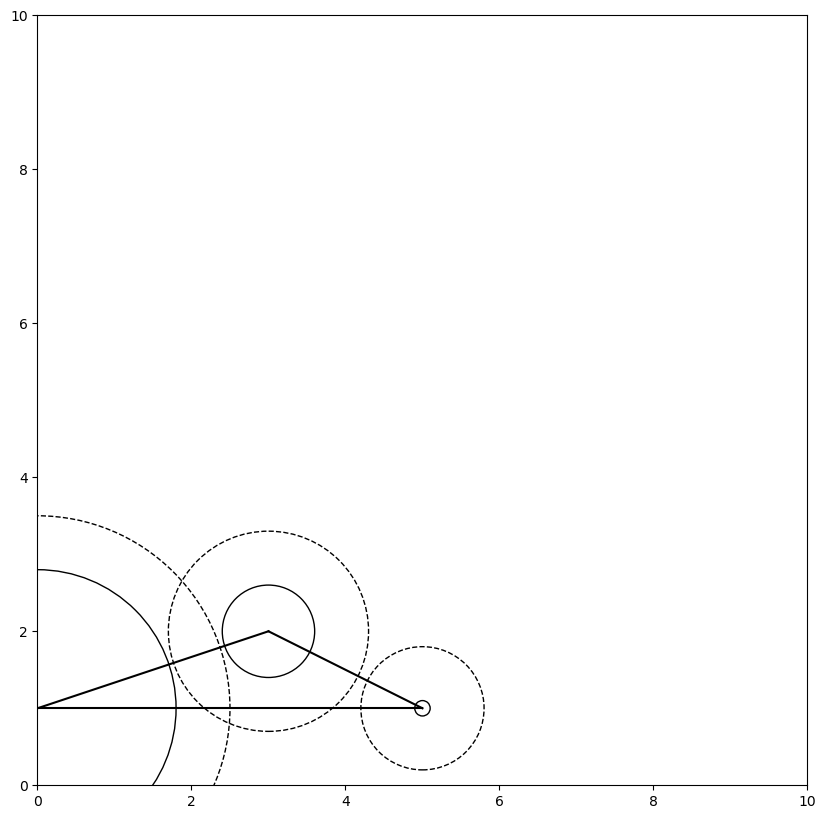

In [213]:
plt.rcParams["figure.figsize"] = (10,10)

ax=plt.gca()

ax.add_patch(plt.Circle(disc1, radius=r1, color='k', fill=False))
ax.add_patch(plt.Circle(disc2, radius=r2, color='k', fill=False))
ax.add_patch(plt.Circle(disc3, radius=r3, color='k', fill=False))
plt.plot([disc1[0], disc2[0]], [disc1[1], disc2[1]], color='k')
plt.plot([disc1[0], disc3[0]], [disc1[1], disc3[1]], color='k')
plt.plot([disc2[0], disc3[0]], [disc2[1], disc3[1]], color='k')

ax.add_patch(plt.Circle(disc1, radius=r1+rp, linestyle='--', color='k', fill=False))
ax.add_patch(plt.Circle(disc2, radius=r2+rp, linestyle='--', color='k', fill=False))
ax.add_patch(plt.Circle(disc3, radius=r3+rp, linestyle='--', color='k', fill=False))

#ax.add_patch(plt.Circle(discp, radius=rp, color='r', fill=False))

#x,y = bar2xy([b1,b2,b3], disc1, disc2, disc3)
#plt.plot(2.73, 1.19, marker="o", markersize=10, color="red")

plt.axis('scaled')
plt.xlim(0,10)
plt.ylim(0,10)

plt.show()

In [214]:
from numpy import random
from math import sqrt

In [215]:
def is_permeable_mc(rp, disc1, r1, disc2, r2, disc3, r3):

    rnd = random.uniform(0, 1, [500000,2])
    sample=[]
    for ii,jj in rnd:
        if ii+jj<=1.0:
            sample.append([ii,jj,1.0-ii-jj])

    pasa=False
    
    for u,v,w in sample:
        
        x = u*disc1[0]+v*disc2[0]+w*disc3[0]
        y = u*disc1[1]+v*disc2[1]+w*disc3[1]

        if (r1+rp)<euclidean([x,y],disc1):
            if (r2+rp)<euclidean([x,y],disc2):
                if (r3+rp)<euclidean([x,y],disc3):
                    pasa=True
                    break

    return pasa

In [216]:
def is_permeable(rp, disc1, r1, disc2, r2, disc3, r3):

    pasa = False

    v12 = disc2-disc1
    d12 = sqrt(v12[0]**2+v12[1]**2)
    u12 = v12/d12
    
    if d12>r1+r2+2*rp:

        vs = disc3-(disc1+(r1+rp)*u12)

        ds = sqrt(vs[0]**2+vs[1]**2)
        if ds>r3+rp:
            pasa = True

        if not pasa:
            vs = disc3-(disc2-(r2+rp)*u12)
            ds = sqrt(vs[0]**2+vs[1]**2)
            if ds>r3+rp:
                pasa = True

    else:

        uperp12=np.array([-u12[1],u12[0]])

        d13 = disc3-disc1
        if 0>uperp12[0]*d13[0]+uperp12[1]*d13[0]:
            uperp12=-uperp12

        aa = 4*d12**2*(r1+rp)**2-(d12**2-(r2+rp)**2+(r1+rp)**2)**2
        if aa<0.0:
            a=0
        else:
            a = 0.5*(1.0/d12)*sqrt(aa)
        
        pp = disc1+(((d12-r1-r2)/2.0)+r1)*u12+a*uperp12

        vp = disc3-pp
        dp = sqrt(vp[0]**2+vp[1]**2)

        if dp>r3+rp:
            pasa = True

    return pasa

In [217]:
is_permeable(rp, disc1, r1, disc2, r2, disc3, r3)

True

In [218]:
is_permeable_mc(rp, disc1, r1, disc2, r2, disc3, r3)

True